<a href="https://colab.research.google.com/github/kjedrzejczak/Machine_Learning_Bootcamp_practice/blob/main/21_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_moons

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

In [3]:
data[:5]

array([[ 1.58230488,  0.36687604],
       [ 0.32765354,  0.98236569],
       [ 0.48826986, -0.2467652 ],
       [-0.93742051, -0.02942909],
       [ 0.63439695, -0.41222371]])

In [4]:
target[:5]

array([1, 0, 1, 0, 1])

In [5]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


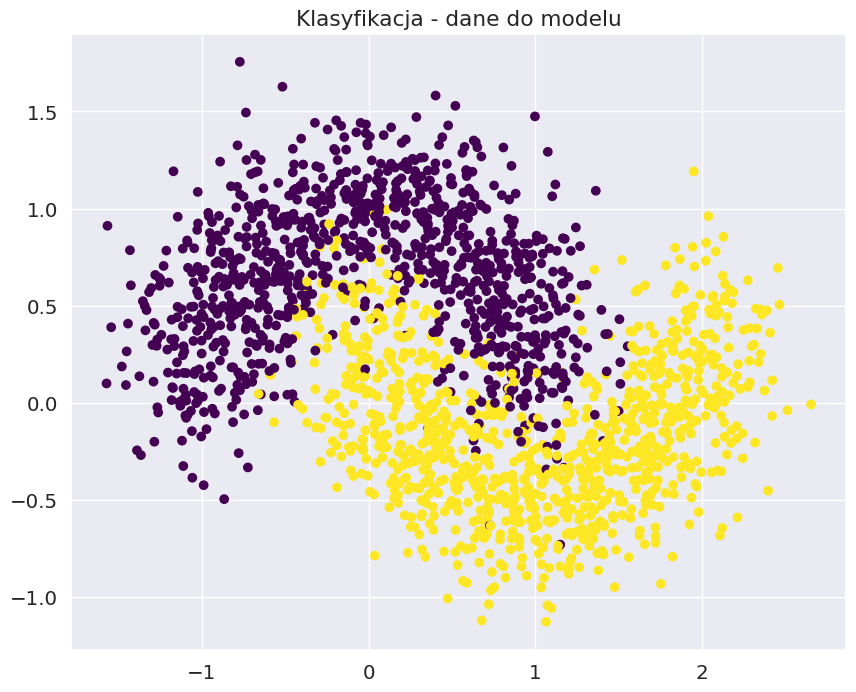

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(df.x1, df.x2, c=df.target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [8]:
for i in [X_train, X_test, y_train, y_test ]:
  print(i.shape)

(1500, 2)
(500, 2)
(1500,)
(500,)


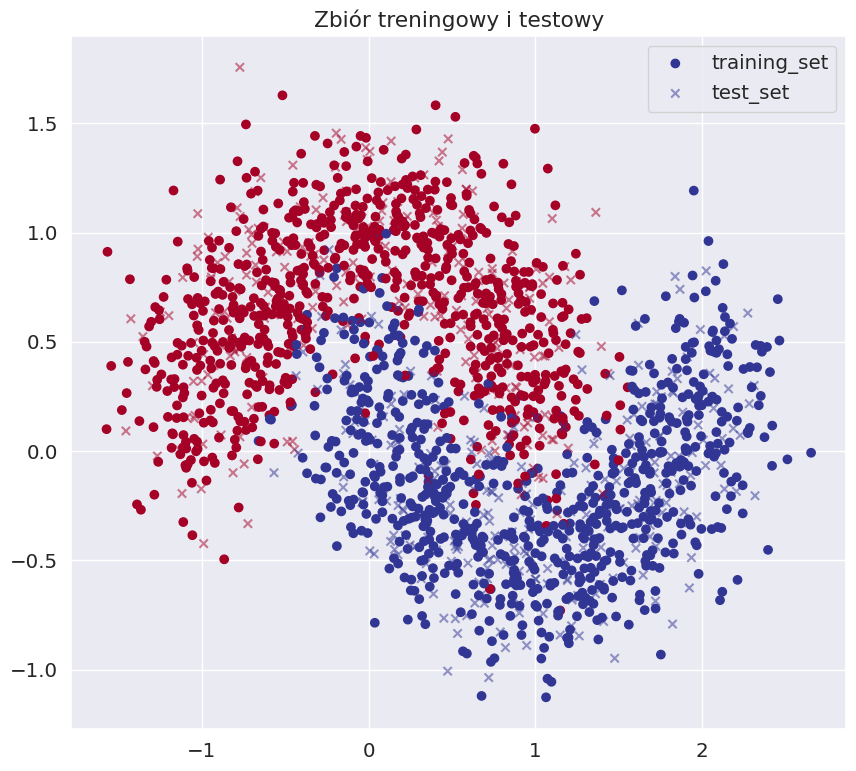

In [9]:
plt.figure(figsize=(10, 9))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', label='test_set', alpha=0.5, marker='x')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10),
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}


grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [11]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

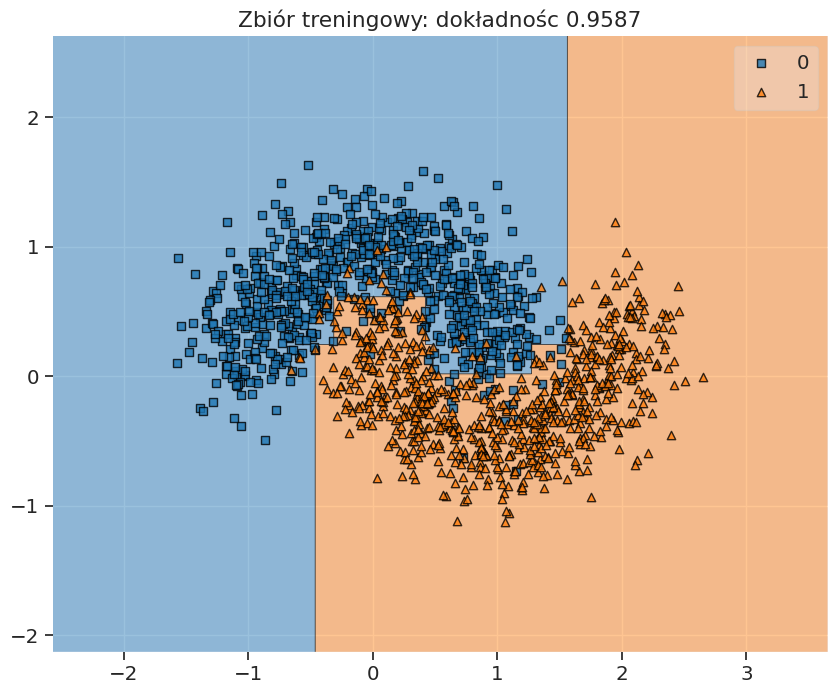

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_train, y_train):.4f}')
plt.show()

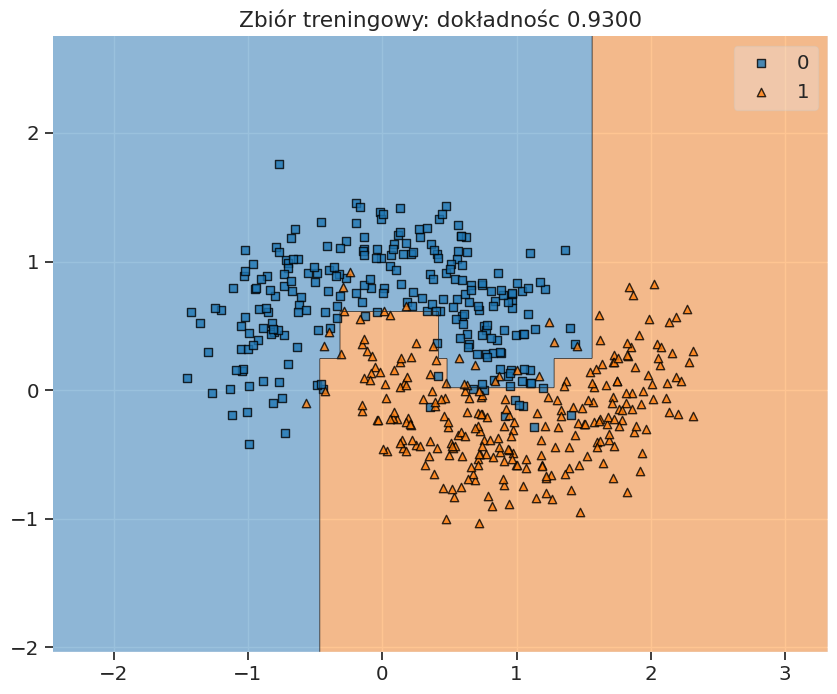

In [13]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1, 10),
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}


grid_search = GridSearchCV(classifier, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [15]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [16]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6)

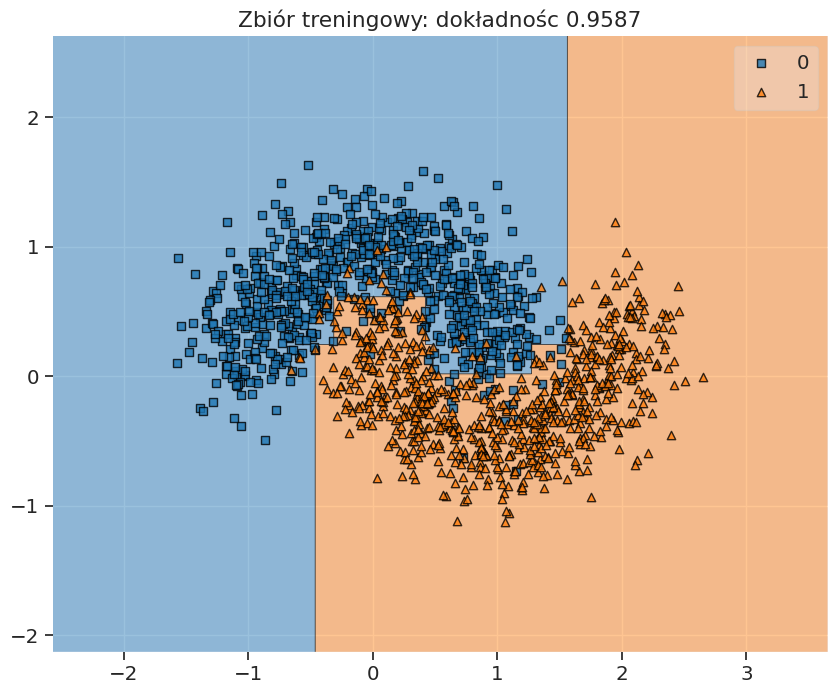

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_train, y_train):.4f}')
plt.show()

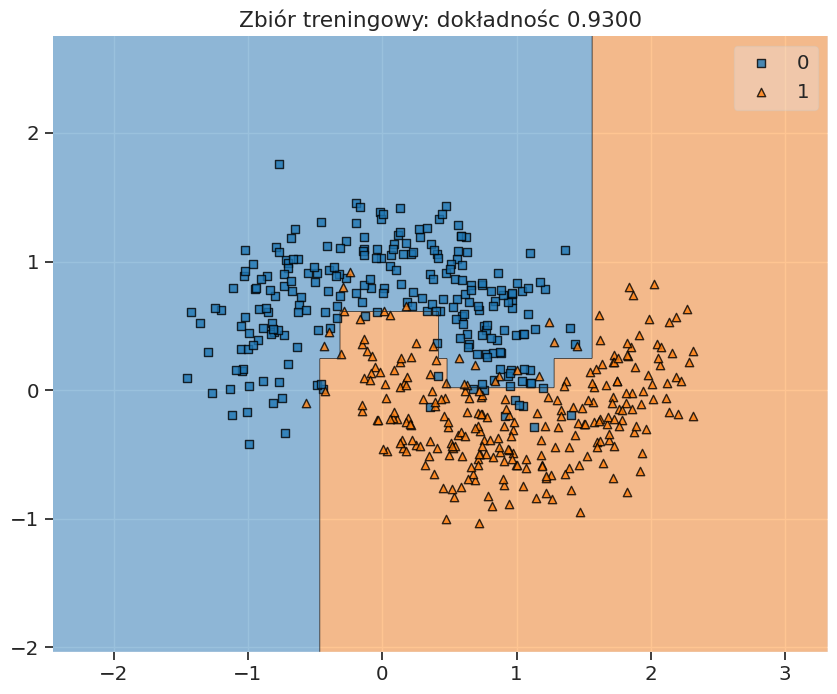

In [18]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_test, y_test):.4f}')
plt.show()

# Dwie siatki

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params_grid = [{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
          {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5]},]


grid_search = GridSearchCV(classifier, param_grid=params_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_leaf': [2, 3, 4, 5]}],
             scoring='accuracy')

In [20]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [21]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5)

# Lasy losowe - przykład

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier(random_state=42)

param_grid = {'criterion':['gini', 'entropy'],
              'max_depth': np.arange(4, 10),
              'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [5, 25, 50]} # liczba drzew tutaj tylko 50

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 25, 50]},
             scoring='accuracy')

In [23]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'n_estimators': 25}

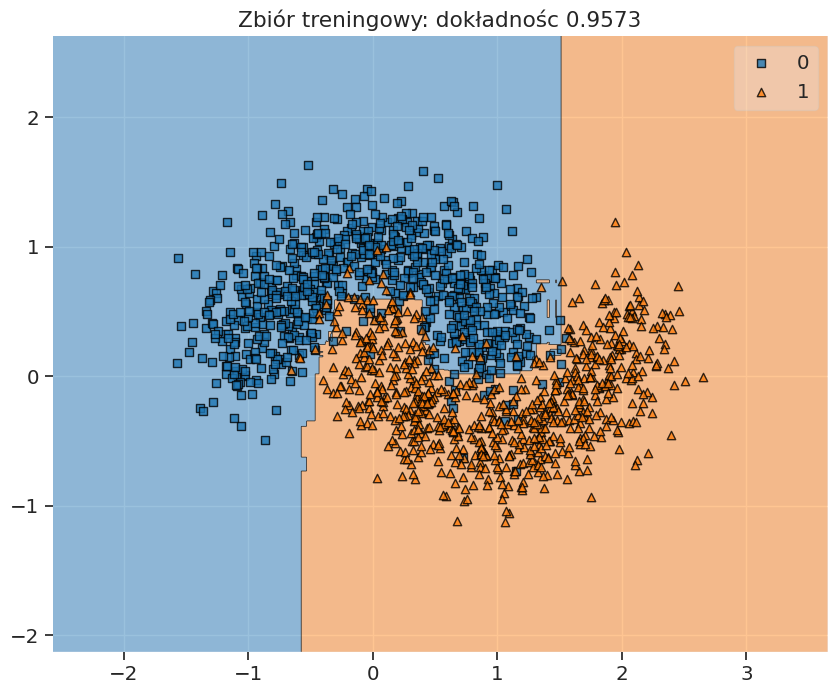

In [24]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_train, y_train):.4f}')
plt.show()

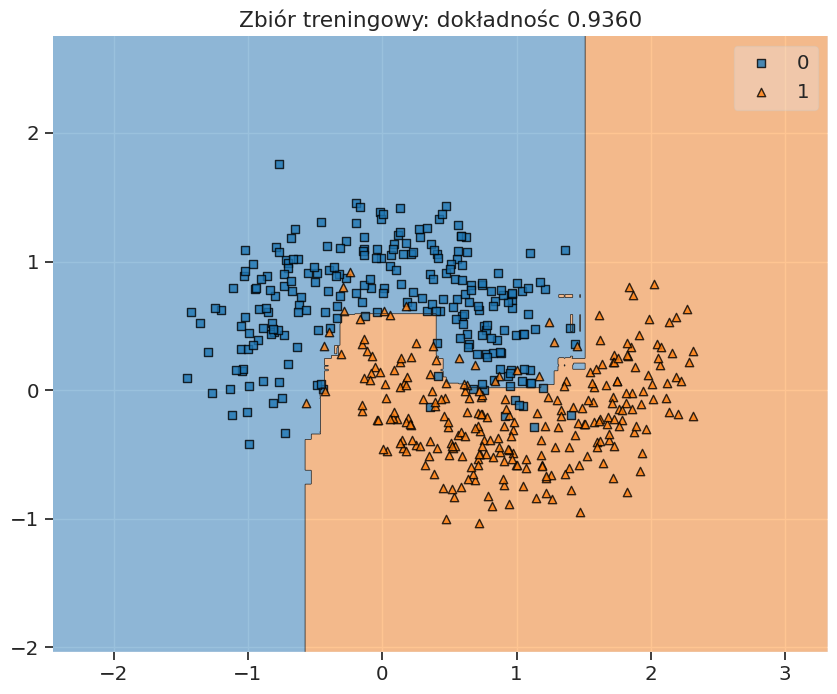

In [25]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładnośc {grid_search.score(X_test, y_test):.4f}')
plt.show()